In [1]:
from sqlalchemy import create_engine, inspect
import numpy as np
import pandas as pd
import pyspark
import seaborn as sns
import matplotlib.pyplot as plt
spark = pyspark.sql.SparkSession.builder.getOrCreate()

In [ ]:
# engine = create_engine("sqlite:///alaska_oil_data.db")
# query = 'SELECT * FROM {} WHERE {};'

# df_prod = pd.read_sql(query.format("production", "pool = 'PRUDHOE OIL' AND lower(ProductionMethod) NOT LIKE '%shut%' AND lower(WellStatus) NOT LIKE '%plug%'"), engine)
# df_inj = pd.read_sql(query.format("injection", "pool = 'PRUDHOE OIL' AND lower(InjectionType) NOT LIKE '%disposal%' AND lower(InjectionType) NOT LIKE '%storage%' AND lower(InjectionType) NOT LIKE '%shut%' AND lower(InjectionMethod) NOT LIKE '%shut%' AND lower(WellStatus) NOT LIKE '%abandon%'"), engine)

## Creating Engine to Access Spotify Kaggle Database

In [2]:
engine = create_engine("sqlite:///data/spotify_kaggle.db")
inspector = inspect(engine)

In [3]:
all_tables = inspector.get_table_names()
all_tables

['artists', 'data_by_genres', 'data_by_year', 'tracks']

In [ ]:
# pd.read_sql('SELECT * FROM tracks;', engine)

In [ ]:
# pd.read_sql('SELECT * FROM data_by_genres;', engine)

## Loading in Cleaning the Tracks, Artists, Data_By_Genres, and Data_By_Year DataFrames

In [4]:
initial_query = 'SELECT * FROM {};'

In [ ]:
# query = 'SELECT * FROM {} WHERE {} ORDER BY {};'

In [5]:
tracks_df = pd.read_sql(initial_query.format('tracks'),engine)
artists_df = pd.read_sql(initial_query.format('artists'), engine)
data_by_genres_df = pd.read_sql(initial_query.format('data_by_genres'),engine)
data_by_year_df = pd.read_sql(initial_query.format('data_by_year'),engine)

## Cleaning tracks_df

In this dataframe, we have 2 columns which contain lists. However, the lists are stored as strings, and which also preserves the extraneous quotation marks as part of the artists' names.

We need to convert the list of artists for each song into a list with correct artist names, and strip for any extra spaces.

We also need to convert the release date to datetime format.

In [ ]:
tracks_df

In [ ]:
# checking datatypes
tracks_df.dtypes

In [6]:
def list_column_cleaner(df_list_column):
    df_list_column = df_list_column.apply(lambda x: x[1:-1].split(','))
    df_list_column = [[i.replace("'", '').strip()for i in val_list] for val_list in df_list_column]
    return df_list_column

In [7]:
tracks_df['artists'] = list_column_cleaner(tracks_df['artists'])
tracks_df['id_artists'] = list_column_cleaner(tracks_df['id_artists'])

In [8]:
tracks_df['artists'][586670]

['Gentle Bones', 'Clara Benin']

In [9]:
tracks_df['id_artists'][586670]

['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2gkqjn']

In [ ]:
# tracks_df['release_date'] = pd.to_datetime(tracks_df['release_date'], format='%Y-%m-%d')

In [ ]:
type(tracks_df['release_date'][0])

In [10]:
tracks_df['loudness'].value_counts()

-8.026     116
-4.470      95
-5.797      95
-5.584      81
-7.348      80
          ... 
-27.147      1
-33.876      1
-36.499      1
-1.956       1
-26.218      1
Name: loudness, Length: 29196, dtype: int64

In [11]:
tracks_df['duration_sec'] = tracks_df['duration_ms']/1000

In [12]:
tracks_df = tracks_df.drop(columns=['duration_ms'])

In [13]:
tracks_df

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_sec
0,35iwgR4jXetI318WEWsa1Q,Carve,6,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,126.903
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,[Fernando Pessoa],[14jtPCOoNZwquk5wd9DxrY],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,98.200
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,181.640
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,176.907
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,[Dick Haymes],[3BiJGZsyX9sJchTqcSA7Su],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,163.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,0,[阿YueYue],[1QLBXKM5GCpyQQSVMNZqrZ],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,258.267
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,0,[ROLE MODEL],[1dy5WNgIKQU6ezkpZs4y8z],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,153.293
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,0,[FINNEAS],[37M5pPGs6V1fchFJSgCguX],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,187.601
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,0,"[Gentle Bones, Clara Benin]","[4jGPdu95icCKVF31CcFKbS, 5ebPSE9YI5aLeZ1Z2gkqjn]",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,142.003


## Cleaning artists_df
Similarly to tracks_df, artists_df contains a column of lists (genres) that needs to be cleaned.

In [14]:
artists_df

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
...,...,...,...,...,...
1104344,6rJIG42vcWAf1UBdRFlQxB,3345.0,[],Cody Longo,8
1104345,1ljurfXKPlGncNdW3J8zJ8,2123.0,['deep acoustic pop'],Right the Stars,18
1104346,2vnT9YhKIvjVo9LnVjWmr2,26.0,[],Jesse Giddings,0
1104347,3ID0E5XCvnJIYZEq043ZoB,406.0,[],The Boy Band Project,0


In [15]:
artists_df['genres'] = list_column_cleaner(artists_df['genres'])

In [16]:
type(artists_df['genres'][1104345])

list

<AxesSubplot:xlabel='popularity', ylabel='Count'>

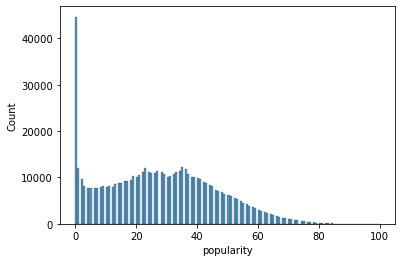

In [17]:
sns.histplot(data=tracks_df, x=tracks_df['popularity'])

## Saving Tracks & Artists Dataframes as CSV Files

This is so I can load the dataframes on my streamlit app, as I'm having issues with my SQLalchemy installation.

In [ ]:
tracks_df.to_csv('data/tracks_df.csv', index=False)

In [ ]:
artists_df.to_csv('data/artists_df.csv', index=False)

In [49]:
tracks_df.loc[tracks_df['name'].str.lower()=='Rigamortus']

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_sec


## Running a Linear Regression to Predict Popularity

In [18]:
tracks_df.corr()

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_sec
popularity,1.000000,0.211758,0.187000,0.302315,0.015299,0.327028,-0.033655,-0.047357,-0.370882,-0.236487,-0.048740,0.004643,0.071364,0.086759,0.027681
explicit,0.211758,1.000000,0.150229,0.123076,0.010932,0.134603,-0.051754,0.102258,-0.149018,-0.067520,-0.013114,-0.016539,0.005745,0.044447,-0.016747
danceability,0.187000,0.150229,1.000000,0.241563,0.018824,0.251436,-0.044719,0.199310,-0.242951,-0.225900,-0.106168,0.528150,-0.040783,0.146196,-0.120371
energy,0.302315,0.123076,0.241563,1.000000,0.036294,0.764735,-0.065246,-0.053506,-0.715412,-0.195839,0.124632,0.372276,0.230099,0.188983,0.024825
key,0.015299,0.010932,0.018824,0.036294,1.000000,0.027109,-0.129491,-0.001035,-0.027414,-0.006776,-0.006774,0.019992,0.004904,0.008928,0.004626
loudness,0.327028,0.134603,0.251436,0.764735,0.027109,1.000000,-0.040464,-0.167112,-0.519423,-0.329306,0.029529,0.275448,0.189288,0.164377,0.000337
mode,-0.033655,-0.051754,-0.044719,-0.065246,-0.129491,-0.040464,1.000000,-0.017992,0.058918,-0.010008,0.007009,0.011474,0.007871,-0.015892,-0.027610
speechiness,-0.047357,0.102258,0.199310,-0.053506,-0.001035,-0.167112,-0.017992,1.000000,0.069060,-0.102440,0.207047,0.046501,-0.086911,-0.114171,-0.125771
acousticness,-0.370882,-0.149018,-0.242951,-0.715412,-0.027414,-0.519423,0.058918,0.069060,1.000000,0.204412,-0.004738,-0.180939,-0.195235,-0.173927,-0.064434
instrumentalness,-0.236487,-0.067520,-0.225900,-0.195839,-0.006776,-0.329306,-0.010008,-0.102440,0.204412,1.000000,-0.038848,-0.175226,-0.055477,-0.042257,0.069278


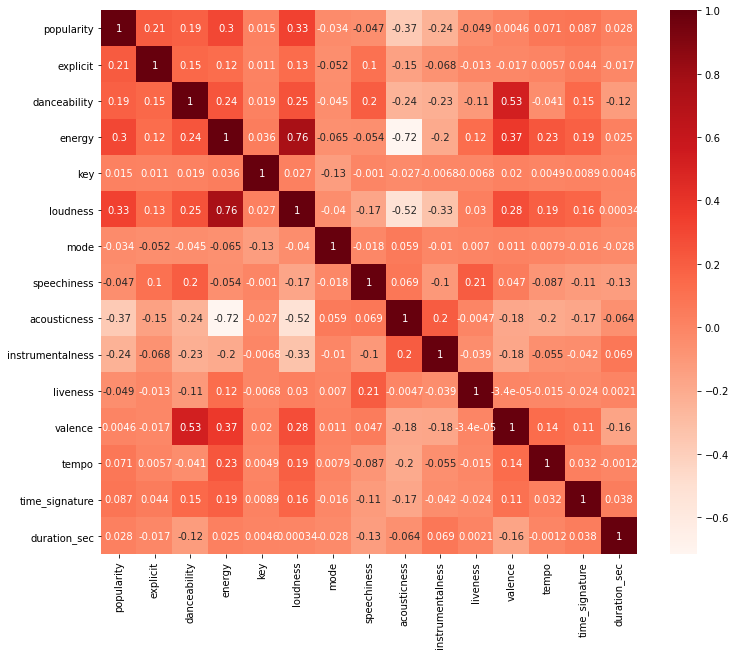

In [19]:
plt.figure(figsize=(12,10))
cor = tracks_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
sns.pairplot(tracks_df)

In [32]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [24]:
X = tracks_df[['duration_sec', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

y = tracks_df['popularity']

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [30]:
lm = LinearRegression()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

In [38]:
lm_reg = Ridge(alpha=1)
poly = PolynomialFeatures(degree=3)

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [39]:
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.226
Ridge Regression val R^2: 0.226
Degree 2 polynomial regression val R^2: 0.314


In [40]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.229


In [41]:
from sklearn.model_selection import KFold

X = tracks_df[['duration_sec', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

y = tracks_df['popularity']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [47]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 42)
cv_lm_reg_r2s = [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm_reg = Ridge(alpha=1)

    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))


print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Ridge scores:  [0.22619863542432161, 0.2246874182102384, 0.22610255611735286, 0.22228513371313185, 0.22553253426385822] 

Ridge mean cv r^2: 0.225 +- 0.001


In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=1)
lm_reg.fit(X_scaled,y)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

Ridge Regression test R^2: 0.229


In [ ]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
        

In [ ]:
split_and_validate(X,y)

Features with Categorical Data:

time_signature, mode, key, explicit, 

In [ ]:
tracks_df['time_signature'].value_counts()

In [ ]:
pd.get_dummies(tracks_df['time_signature']).head()

In [ ]:
split_and_validate(pd.get_dummies(tracks_df),y)

In [ ]:
tracks_df['mode'].value_counts()

In [ ]:
tracks_df['key'].value_counts()

In [ ]:
tracks_df['explicit'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

lr = LinearRegression()
scaler = StandardScaler()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
import math

In [ ]:
X2 = X.copy()

X2['duration_ms'] = X2['duration_ms']**0.5

In [ ]:
split_and_validate(X2,y)

## Converting Pandas Dataframes to Spark Dataframes

Using sparkdf = spark.createDataFrame(pandasDF)

In [ ]:
spark_tracks_df = spark.createDataFrame(tracks_df)
# spark_artists_df = spark.createDataFrame(tracks_df)

In [ ]:
spark_tracks_df.printSchema()

In [ ]:
req_columns = ['popularity', 'duration_sec', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
ml_spark_tracks_df = spark_tracks_df.select(req_columns)

In [ ]:
ml_spark_tracks_df

In [ ]:
from pyspark.ml.linalg import DenseVector

In [ ]:
input_data = ml_spark_tracks_df.rdd.map(lambda x: (x[0], DenseVector(x[1:])))

In [ ]:
scaled_ml_tracks_df = spark.createDataFrame(input_data, ['label', 'features'])

In [ ]:
from pyspark.ml.feature import StandardScaler
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")
scaler = standardScaler.fit(scaled_ml_tracks_df)
scaled_df = scaler.transform(scaled_ml_tracks_df)

scaled_df.take(2)

In [ ]:
from pyspark.ml.feature import StandardScaler
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")
scaler = standardScaler.fit(df)
scaled_df = scaler.transform(df)
scaled_df.take(2)

In [ ]:
train_data, test_data = scaled_df.randomSplit([.8,.2],seed=1234)

In [ ]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(labelCol="label", maxIter=10, regParam=0.3, elasticNetParam=0.8)
linearModel = lr.fit(train_data)

In [ ]:
predicted = linearModel.transform(test_data)
predictions = predicted.select("prediction").rdd.map(lambda x: x[0])
labels = predicted.select("label").rdd.map(lambda x: x[0])

In [ ]:
predictionAndLabel = predictions.zip(labels).collect()

In [ ]:
predictionAndLabel[:5]

In [ ]:
linearModel.coefficients

In [ ]:
linearModel.intercept

In [ ]:
linearModel.summary.rootMeanSquaredError

In [ ]:
linearModel.summary.r2

In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests, os, sys

if sys.version_info.major == 3:
    from io import StringIO
else:
    from StringIO import StringIO

import pyspark

In [ ]:
train, test = ml_spark_tracks_df.randomSplit([0.7,0.3], seed=42)

In [ ]:
from pyspark.ml.feature import VectorAssembler
features = ml_spark_tracks_df.schema.names[1:]

assembler = VectorAssembler(inputCols=features, outputCol='features')
train_pack = assembler.transform(train)
test_pack = assembler.transform(test)

In [ ]:
from pyspark.ml.feature import MinMaxScaler

minmaxscale = MinMaxScaler(inputCol='features', outputCol='features_scaled')
minmaxscale = minmaxscale.fit(train_pack)

train_pack = minmaxscale.transform(train_pack)
test_pack  = minmaxscale.transform(test_pack)

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier, GBTClassifier, LogisticRegression

In [ ]:
spark_tracks_df.show()

In [ ]:
explicit_filter = spark_tracks_df.filter(spark_tracks_df.explicit == 1)

In [ ]:
explicit_filter.filter(spark_tracks_df.explicit == 1).show()

In [ ]:
sxpark_tracks_df.first()

In [ ]:
all_tracks.corr()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(all_tracks.corr(), cmap="seismic",annot=True, ax=ax);

In [ ]:
spark_all_tracks = spark.createDataFrame(all_tracks)

In [ ]:
spark_all_tracks.show(5)

In [ ]:
pd.read_sql('SELECT * FROM artists', engine)

In [ ]:
def list_column_cleaner(df_list_column):
    df_list_column = df_list_column.apply(lambda x: x[1:-1].split(','))
    df_list_column = [list_cleaner(value_list) for value_list in df_list_column]
    return df_list_column
    

In [ ]:
def list_cleaner(value_list):
    value_list = [i.replace("'", '').strip() for i in value_list]
    
    return value_list

In [ ]:
def list_cleaner(artist_genre_list):
    artist_genre_list = [i.replace("'", '').strip() for i in artist_genre_list]
    
    return artist_genre_list

In [ ]:
artist_df = pd.read_sql('SELECT * FROM artists ORDER BY popularity DESC', engine)

artist_df['genres'] = artist_df['genres'].apply(lambda x: x[1:-1].split(','))

In [ ]:
#######
artist_df['genres'] = [list_cleaner(genre_list) for genre_list in artist_df['genres']]

In [ ]:
artist_df['genres']

In [ ]:
artist_df['genres'][0]

In [ ]:
popular_artists = artist_df[artist_df.popularity >= 70]
popular_artists

In [ ]:
popular_artist_genres_lists = popular_artists['genres'].tolist()

In [ ]:
popular_artist_genres_lists

In [ ]:
def list_combiner(list_of_lists):
    
    for i in list_of_lists[1:]:
        list_of_lists[0].extend(i)
        
    return list_of_lists[0]

In [ ]:
popular_artist_genres = pd.DataFrame({'genre':list_combiner(popular_artist_genres_lists)})

In [ ]:
popular_artist_genres

## Genre Counts for All Artists with Popularity Level of 70 or Above

In [ ]:
# popular_genre_instances = popular_artist_genres['genre'].value_counts().rename_axis('unique_genres').reset_index(name='counts')
# popular_genre_instances = popular_artist_genres['genre'].value_counts().rename_axis('unique_genres').reset_index(name='counts').replace(r'^\s*$', np.NaN, regex=True)
popular_genre_instances = popular_artist_genres['genre'].value_counts().rename_axis('unique_genres').reset_index(name='counts').replace(r'^\s*$', 'no_genre', regex=True)
popular_genre_instances

In [ ]:
popular_genre_instances.unique_genres[26]

In [ ]:
top_genres_popular_artists = popular_genre_instances.head(50)

In [ ]:
plt.figure(facecolor='white')
fig, ax = plt.subplots(figsize=(30,10))

sns.barplot(x=top_genres_popular_artists['unique_genres'], y=top_genres_popular_artists['counts'])

plt.xticks(rotation=90)
plt.title('Top 50 Genres of Music Among Artists with Popularity Level of 70 or Above')

Same thing as above, but with Spark: